In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
# sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
sys.path.insert(1, '/home/lalandmi/Dropbox/Thèse/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


In [2]:
path = '/home/lalandmi/data/C-SNOW/sentinel1_snow_depth_data/'

In [3]:
ds = xr.open_dataset(path+'SD_20190519.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 4500, lon: 34703)
Coordinates:
  * lon        (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat        (lat) float64 22.6 22.61 22.62 22.63 ... 84.74 84.83 84.91 85.0
Data variables:
    snc        (lon, lat) float32 ...
    snd_ini    (lon, lat) float32 ...
    flags_ini  (lon, lat) float64 ...
    snd_upd    (lon, lat) float32 ...
    flags_upd  (lon, lat) float64 ...

In [7]:
ds.lon.values

array([-179.99481328, -179.98443983, -179.97406639, ...,  179.96369295,
        179.97406639,  179.98443983])

In [9]:
ds.snc.plot(x=ds.lon.values, y=ds.lat.values)

TypeError: unhashable type: 'numpy.ndarray'

In [15]:
ds = ds.assign_coords(lat = np.flip(ds.lat.values))

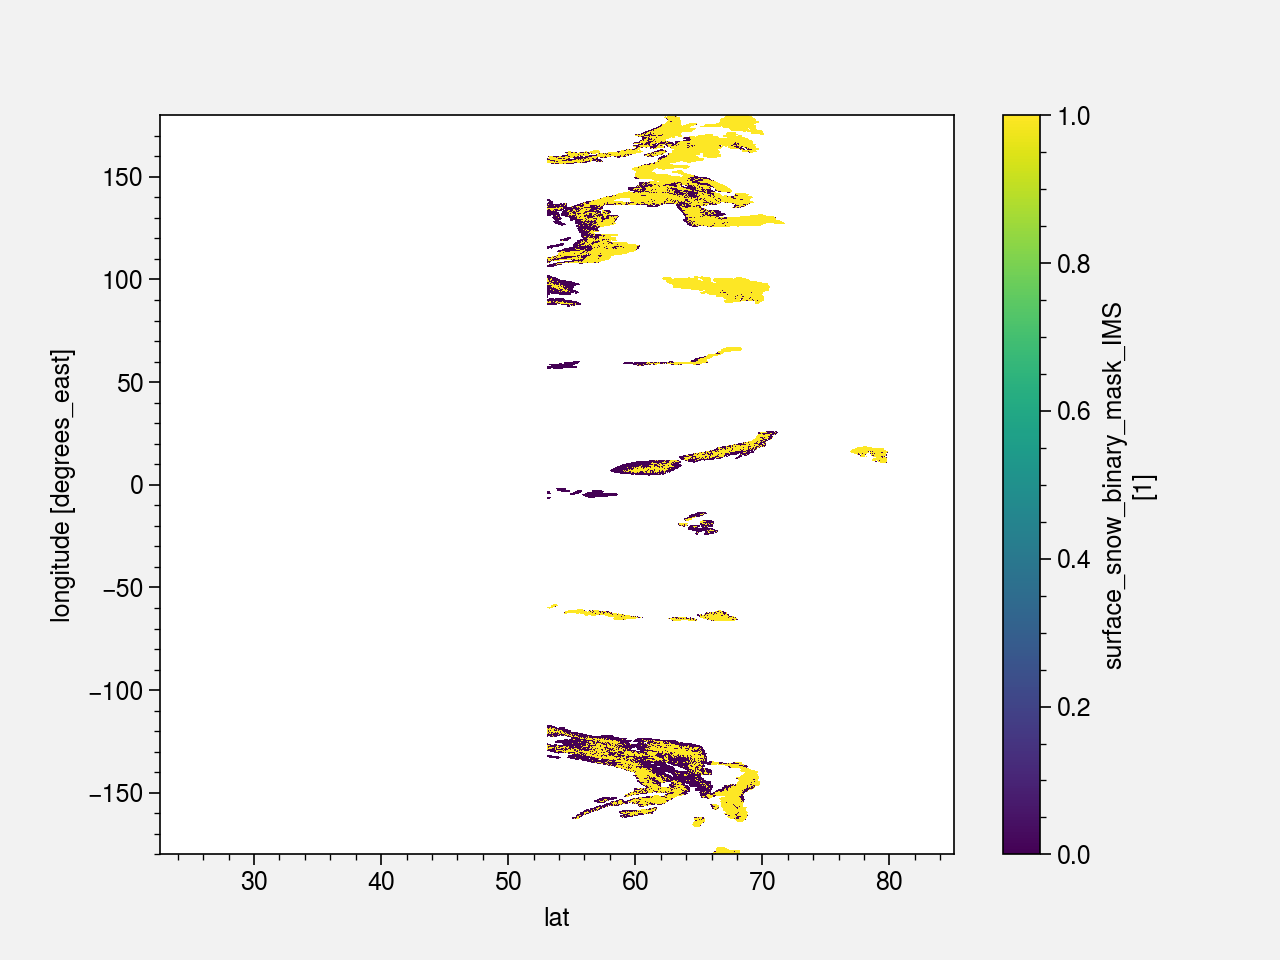

In [17]:
ds.snc.plot()

In [18]:
snc = ds.snc.sel(lon=slice(60,120), lat=slice(15,45)).load()

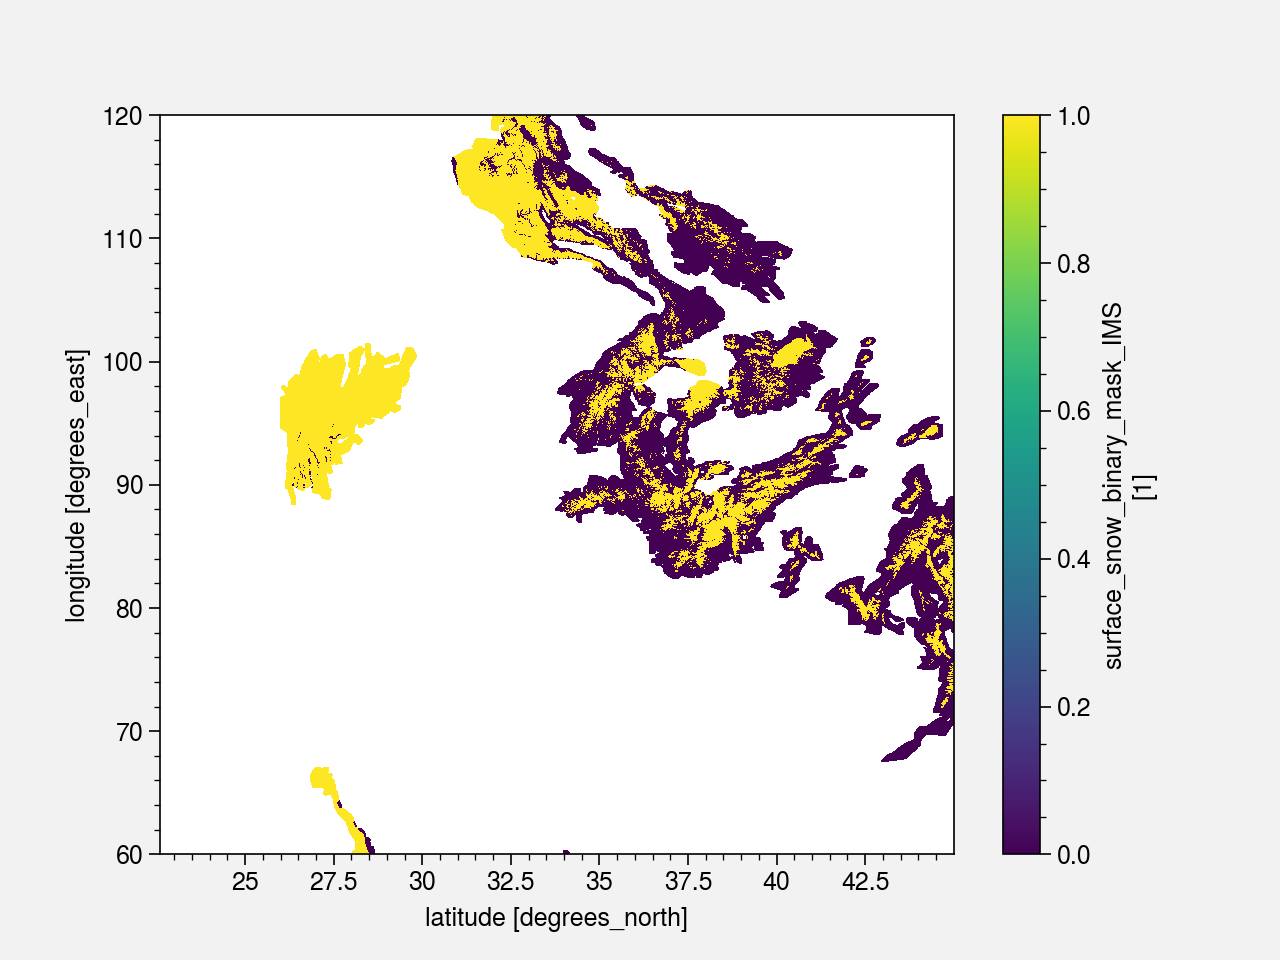

In [20]:
snc.plot()

In [19]:
fig, axs = plot.subplots(proj='cyl')

axs[0].contourf(snc)

axs.format(
    labels=True,
    latlim=(snc.lat.min(), snc.lat.max()),
    lonlim=(snc.lon.min(), snc.lon.max()),
    borders=True,
    coast=True
)

Error in callback <function flush_figures at 0x14561fe7c670> (for post_execute):


KeyboardInterrupt: 